# Preparacion de datos

## Extracción del Archivo Tratado

Carga el archivo CSV que contiene los datos tratados anteriormente.
📂 Atención: Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.

In [23]:
import pandas as pd

# Cargar el archivo JSON
df = pd.read_json("TelecomX2_Data.json")

In [24]:
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,estimated_daily_charge,Churn_bin
0,0002-ORFBO,No,Female,0,1,1,9,1,0,DSL,...,1,1,0,One year,1,Mailed check,65.6,593.30,2.19,0
1,0003-MKNFE,No,Male,0,0,0,9,1,1,DSL,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00,0
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Fiber optic,...,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46,1
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Fiber optic,...,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27,1
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Fiber optic,...,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   int64  
 5   customer_Dependents        7043 non-null   int64  
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   int64  
 8   phone_MultipleLines        7043 non-null   int64  
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   int64  
 11  internet_OnlineBackup      7043 non-null   int64  
 12  internet_DeviceProtection  7043 non-null   int64  
 13  internet_TechSupport       7043 non-null   int64

## Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [26]:
df.drop(columns=["customerID"], inplace=True)

In [27]:
df.head()

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,...,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,estimated_daily_charge,Churn_bin
0,No,Female,0,1,1,9,1,0,DSL,0,...,1,1,0,One year,1,Mailed check,65.6,593.30,2.19,0
1,No,Male,0,0,0,9,1,1,DSL,0,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00,0
2,Yes,Male,0,0,0,4,1,0,Fiber optic,0,...,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46,1
3,Yes,Male,1,1,0,13,1,0,Fiber optic,0,...,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27,1
4,Yes,Female,1,1,0,3,1,0,Fiber optic,0,...,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80,1


## Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning.

Utiliza un método de codificación adecuado, como one-hot encoding.

🔎 Sugerencia:
Puedes consultar este artículo para entender mejor cuándo usar get_dummies o OneHotEncoder

In [28]:
# Lista de columnas categóricas a transformar
columnas_categoricas = [
    "customer_gender",
    "internet_InternetService",
    "account_Contract",
    "account_PaymentMethod"
]

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

# Mostrar nuevas columnas
print(df_encoded.columns)


Index(['Churn', 'customer_SeniorCitizen', 'customer_Partner',
       'customer_Dependents', 'customer_tenure', 'phone_PhoneService',
       'phone_MultipleLines', 'internet_OnlineSecurity',
       'internet_OnlineBackup', 'internet_DeviceProtection',
       'internet_TechSupport', 'internet_StreamingTV',
       'internet_StreamingMovies', 'account_PaperlessBilling',
       'account_Charges_Monthly', 'account_Charges_Total',
       'estimated_daily_charge', 'Churn_bin', 'customer_gender_Male',
       'internet_InternetService_Fiber optic', 'internet_InternetService_No',
       'account_Contract_One year', 'account_Contract_Two year',
       'account_PaymentMethod_Credit card (automatic)',
       'account_PaymentMethod_Electronic check',
       'account_PaymentMethod_Mailed check'],
      dtype='object')


In [49]:
# Mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [52]:
df_encoded = df_encoded.drop("Churn", axis=1)


In [53]:
df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes('bool').columns})


In [54]:
df_encoded.head()

,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_PaperlessBilling,account_Charges_Monthly,account_Charges_Total,estimated_daily_charge,Churn_bin,customer_gender_Male,internet_InternetService_Fiber optic,internet_InternetService_No,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0,1,1,9,1,0,0,1,0,1,1,0,1,65.6,593.30,2.19,0,0,0,0,1,0,0,0,1
1,0,0,0,9,1,1,0,0,0,0,0,1,0,59.9,542.40,2.00,0,1,0,0,0,0,0,0,1
2,0,0,0,4,1,0,0,0,1,0,0,0,1,73.9,280.85,2.46,1,1,1,0,0,0,0,1,0
3,1,1,0,13,1,0,0,1,1,0,1,1,1,98.0,1237.85,3.27,1,1,1,0,0,0,0,1,0
4,1,1,0,3,1,0,0,0,0,1,1,0,1,83.9,267.40,2.80,1,0,1,0,0,0,0,0,1


In [55]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer_SeniorCitizen                         7043 non-null   int64  
 1   customer_Partner                               7043 non-null   int64  
 2   customer_Dependents                            7043 non-null   int64  
 3   customer_tenure                                7043 non-null   int64  
 4   phone_PhoneService                             7043 non-null   int64  
 5   phone_MultipleLines                            7043 non-null   int64  
 6   internet_OnlineSecurity                        7043 non-null   int64  
 7   internet_OnlineBackup                          7043 non-null   int64  
 8   internet_DeviceProtection                      7043 non-null   int64  
 9   internet_TechSupport                           7043 

## Verificación de la Proporción de Cancelación (Churn)

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

🔎 Sugerencia:
Puedes usar value_counts() de pandas para obtener esta proporción:
Documentación oficial de value_counts()

In [ ]:
df.head()

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,...,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,estimated_daily_charge,Churn_bin
0,No,Female,0,1,1,9,1,0,DSL,0,...,1,1,0,One year,1,Mailed check,65.6,593.30,2.19,0
1,No,Male,0,0,0,9,1,1,DSL,0,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00,0
2,Yes,Male,0,0,0,4,1,0,Fiber optic,0,...,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46,1
3,Yes,Male,1,1,0,13,1,0,Fiber optic,0,...,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27,1
4,Yes,Female,1,1,0,3,1,0,Fiber optic,0,...,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80,1


In [30]:
# Conteo absoluto
conteo_churn = df_encoded["Churn_bin"].value_counts()
print("Conteo de clases:\n", conteo_churn)

Conteo de clases:
 Churn_bin
0    5174
1    1869
Name: count, dtype: int64


In [31]:
# Porcentaje por clase
porcentaje_churn = df_encoded["Churn_bin"].value_counts(normalize=True) * 100
print("\nPorcentaje de clases:\n", porcentaje_churn)


Porcentaje de clases:
 Churn_bin
0    73.463013
1    26.536987
Name: proportion, dtype: float64


In [32]:
df_encoded["Churn_bin"].unique()

array([0, 1])

In [33]:
df["Churn_bin"].unique()

array([0, 1])

## Balanceo de Clases (opcional)

Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

🔎 Sugerencia:
Puedes leer más sobre cómo manejar el desbalanceo de clases en este artículo:
Artículo en Alura sobre desbalanceo de datos

1. Undersampling
    - Elimina ejemplos de la clase mayoritaria (0) para igualar el número de cancelaciones.

    - Rápido pero puede hacerte perder información.

2. Oversampling (SMOTE) ✅ RECOMENDADO
SMOTE (Synthetic Minority Oversampling Technique) crea datos sintéticos de la clase minoritaria.

Primero instala imblearn si no lo tienes:

!pip install imbalanced-learn

In [56]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Separar features y target
X = df_encoded.drop("Churn_bin", axis=1)
y = df_encoded["Churn_bin"]

# Separar en entrenamiento y prueba (estratificado)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Verificar la nueva distribución
print("Distribución original:", Counter(y_train))
print("Distribución balanceada:", Counter(y_train_bal))

Distribución original: Counter({0: 3622, 1: 1308})
Distribución balanceada: Counter({0: 3622, 1: 3622})


## Normalización o Estandarización (si es necesario)

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

🔎 Sugerencia:
Puedes leer más sobre normalización y estandarización de datos en este artículo:
Artículo en Medium sobre normalización y estandarización en Machine Learning

**Cómo normalizar o estandarizar si decides hacerlo**

Normalización (Min-Max scaling):

Escala los datos para que estén entre 0 y 1

In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

**Estandarización (Z-score scaling):**
Escala los datos para que tengan media 0 y desviación estándar 1

In [60]:
'''from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)'''

'from sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X)'

# 🎯 Correlación y Selección de Variables

## Análisis de Correlación

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# Calcular matriz de correlación
corr_matrix = df_encoded.corr()
corr_matrix.head()

,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_PaperlessBilling,account_Charges_Monthly,account_Charges_Total,estimated_daily_charge,Churn_bin,customer_gender_Male,internet_InternetService_Fiber optic,internet_InternetService_No,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
customer_SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,0.156530,0.220173,0.103006,0.220147,0.150889,-0.001874,0.255338,-0.182742,-0.046262,-0.117000,-0.024135,0.171718,-0.153477
customer_Partner,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,-0.014877,0.096848,0.317504,0.096909,-0.150448,-0.001808,0.000304,0.000615,0.082783,0.248091,0.082029,-0.083852,-0.095125
customer_Dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,-0.111377,-0.113890,0.062078,-0.113939,-0.164221,0.010517,-0.165818,0.139812,0.068368,0.204613,0.060267,-0.150642,0.059071
customer_tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.006152,0.247900,0.826178,0.247910,-0.352229,0.005106,0.019720,-0.039062,0.202570,0.558533,0.233006,-0.208363,-0.233852
phone_PhoneService,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.016505,0.247398,0.113214,0.247361,0.011942,-0.006488,0.289999,0.172209,-0.002791,0.003519,-0.007721,0.003062,-0.003319


In [63]:
# Correlación con la variable objetivo
corr_target = corr_matrix['Churn_bin'].sort_values(ascending=False)
print("Correlación con Churn_bin:\n", corr_target)

Correlación con Churn_bin:
 Churn_bin                                        1.000000
internet_InternetService_Fiber optic             0.308020
account_PaymentMethod_Electronic check           0.301919
estimated_daily_charge                           0.193412
account_Charges_Monthly                          0.193356
account_PaperlessBilling                         0.191825
customer_SeniorCitizen                           0.150889
internet_StreamingTV                             0.063228
internet_StreamingMovies                         0.061382
phone_MultipleLines                              0.040102
phone_PhoneService                               0.011942
customer_gender_Male                            -0.008612
internet_DeviceProtection                       -0.066160
internet_OnlineBackup                           -0.082255
account_PaymentMethod_Mailed check              -0.091683
account_PaymentMethod_Credit card (automatic)   -0.134302
customer_Partner                            

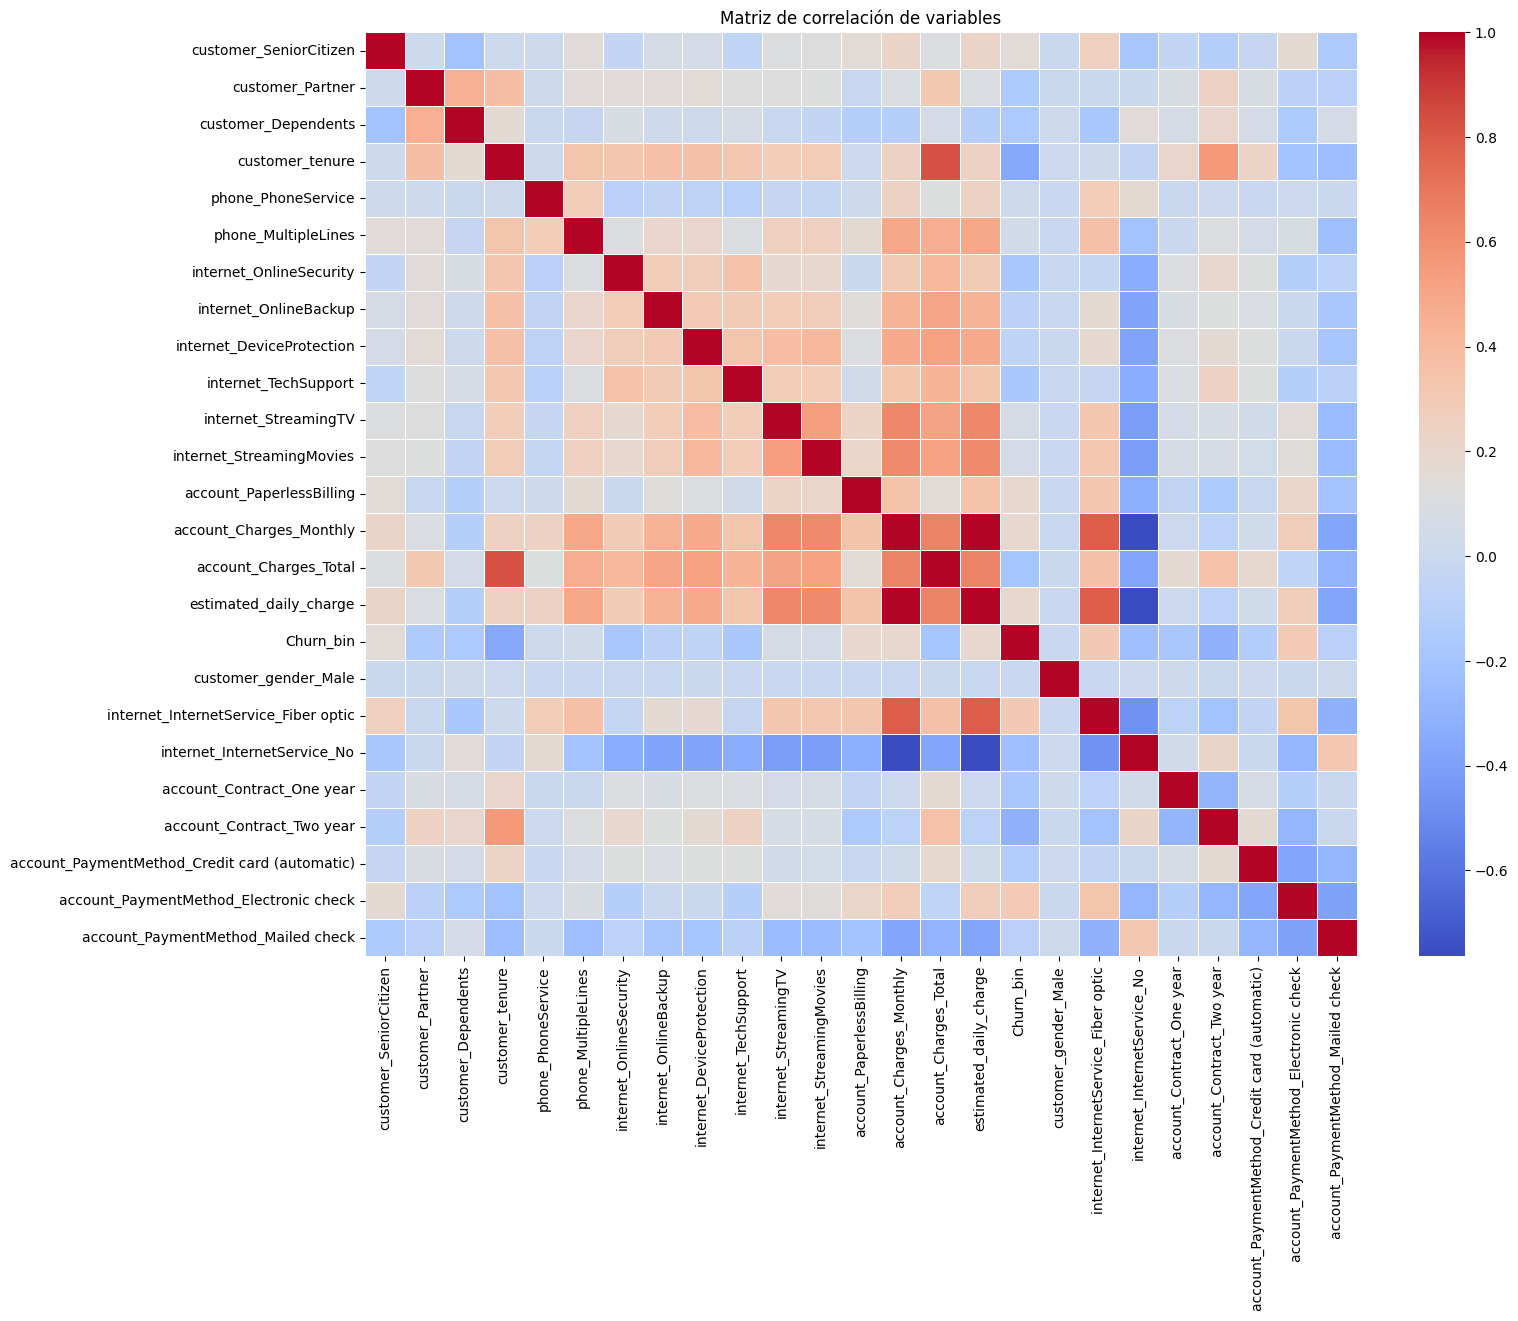

In [64]:
# Mostrar mapa de calor
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación de variables')
plt.show()

In [65]:
# Mostrar variables con correlación fuerte (mayor a 0.2 o menor a -0.2)
print("\nVariables con correlación fuerte con Churn_bin:")
print(corr_target[abs(corr_target) > 0.2])



Variables con correlación fuerte con Churn_bin:
Churn_bin                                 1.000000
internet_InternetService_Fiber optic      0.308020
account_PaymentMethod_Electronic check    0.301919
internet_InternetService_No              -0.227890
account_Contract_Two year                -0.302253
customer_tenure                          -0.352229
Name: Churn_bin, dtype: float64


## Análisis Dirigido

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

- Tiempo de contrato × Cancelación

- Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

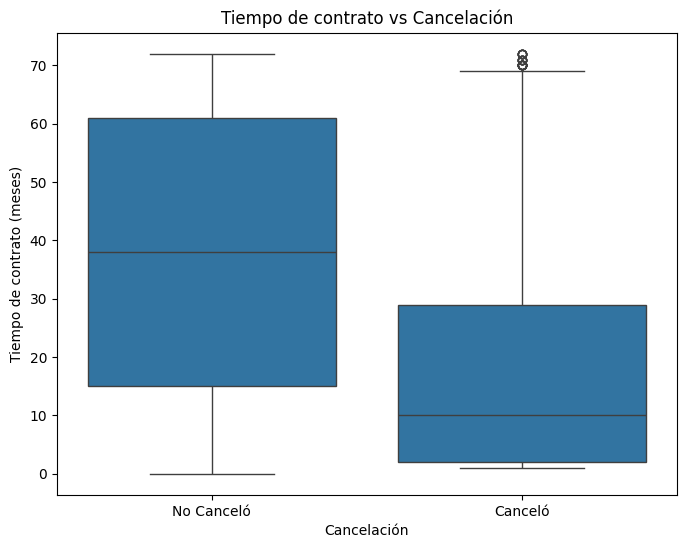

In [66]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn_bin', y='customer_tenure', data=df_encoded)
plt.xticks([0,1], ['No Canceló', 'Canceló'])
plt.title('Tiempo de contrato vs Cancelación')
plt.xlabel('Cancelación')
plt.ylabel('Tiempo de contrato (meses)')
plt.show()

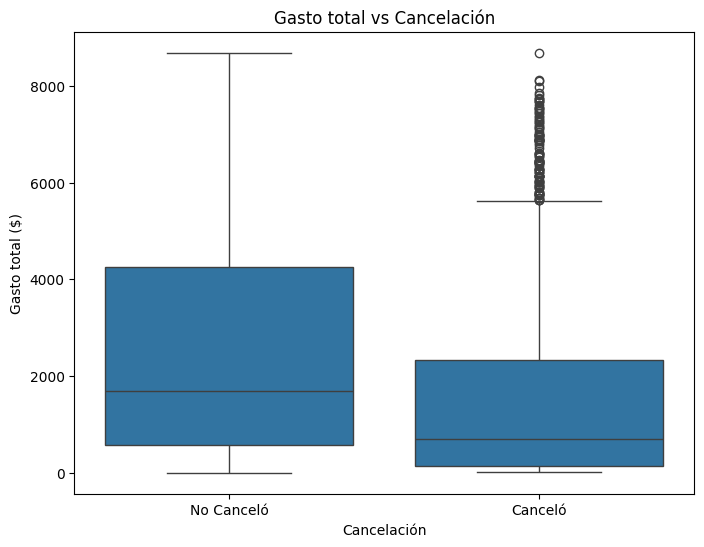

In [67]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn_bin', y='account_Charges_Total', data=df_encoded)
plt.xticks([0,1], ['No Canceló', 'Canceló'])
plt.title('Gasto total vs Cancelación')
plt.xlabel('Cancelación')
plt.ylabel('Gasto total ($)')
plt.show()

# 🤖 Modelado Predictivo

## Separación de Datos

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [72]:
# Definir variables predictoras (features) y objetivo (target)
X = df_encoded.drop('Churn_bin', axis=1)  # Todas menos la columna objetivo
y = df_encoded['Churn_bin']                # Variable objetivo

# Separar en conjunto de entrenamiento y prueba
# stratify=y para mantener la proporción de clases en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,       # 30% prueba, 70% entrenamiento
    random_state=42,     # Para reproducibilidad
    stratify=y           # Mantiene la proporción de clases igual en train y test
)

# Verificar tamaños
print(f'Tamaño conjunto entrenamiento: {X_train.shape[0]} muestras')
print(f'Tamaño conjunto prueba: {X_test.shape[0]} muestras')


Tamaño conjunto entrenamiento: 4930 muestras
Tamaño conjunto prueba: 2113 muestras


In [73]:
total = X.shape[0]

print(f'Tamaño conjunto entrenamiento: {X_train.shape[0]} muestras ({(X_train.shape[0]/total)*100:.2f}%)')
print(f'Tamaño conjunto prueba: {X_test.shape[0]} muestras ({(X_test.shape[0]/total)*100:.2f}%)')


Tamaño conjunto entrenamiento: 4930 muestras (70.00%)
Tamaño conjunto prueba: 2113 muestras (30.00%)


## Creación de Modelos

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

- Un modelo puede requerir normalización, como Regresión Logística o KNN.

- El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

**Justificación:**

- Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

- Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

In [74]:
from sklearn.preprocessing import StandardScaler

# Columnas numéricas continuas para normalizar
cols_num = ['account_Charges_Monthly', 'account_Charges_Total', 'estimated_daily_charge', 'customer_tenure']

scaler = StandardScaler()

# Normalizamos solo las columnas numéricas continuas del conjunto de entrenamiento
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[cols_num] = scaler.fit_transform(X_train[cols_num])
X_test_scaled[cols_num] = scaler.transform(X_test[cols_num])

Modelo 1: Regresión Logística (con normalización)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train_scaled, y_train)

y_pred_lr = model_lr.predict(X_test_scaled)
print("Reporte clasificación - Regresión Logística")
print(classification_report(y_test, y_pred_lr))


Reporte clasificación - Regresión Logística
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



Modelo 2: Random Forest (sin normalización)

In [76]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
print("Reporte clasificación - Random Forest")
print(classification_report(y_test, y_pred_rf))


Reporte clasificación - Random Forest
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.62      0.49      0.55       561

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.77      0.79      0.78      2113



**Justificación breve**
- Regresión Logística: Requiere normalización porque las variables en diferentes escalas afectan el cálculo de los coeficientes y la función de optimización.

- Random Forest: No requiere normalización porque divide el espacio de características por valores umbral y no utiliza distancias o funciones que dependan de la escala.

## Evaluación de los Modelos

Evalúa cada modelo utilizando las siguientes métricas:

- Exactitud (Acurácia)
- Precisión
- Recall
- F1-score
- Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:

- ¿Cuál modelo tuvo el mejor desempeño?
- ¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

    - Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

    - Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.

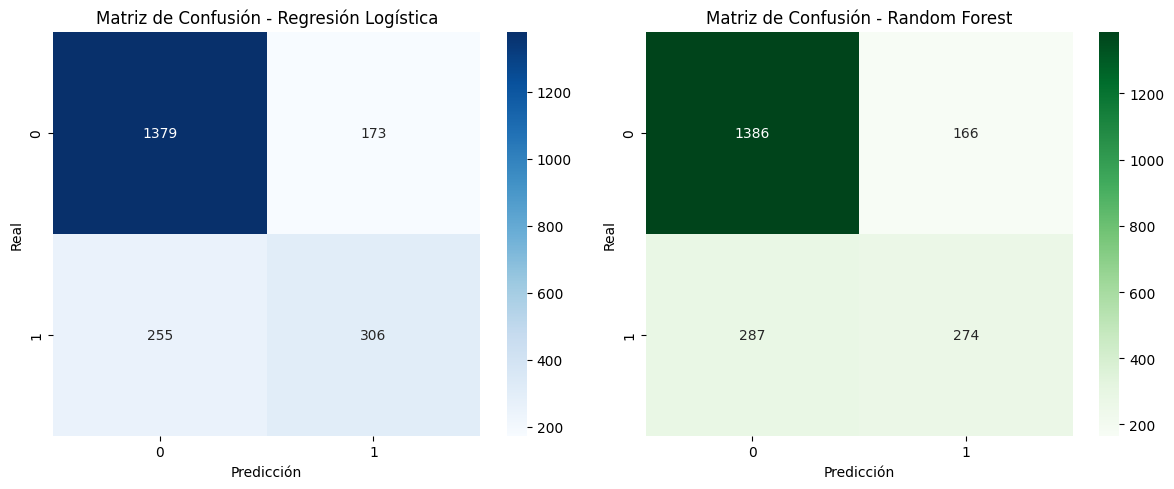

({'Exactitud': 0.7974443918599148,
  'Precisión': 0.6388308977035491,
  'Recall': 0.5454545454545454,
  'F1-score': 0.5884615384615385},
 {'Exactitud': 0.7856128726928537,
  'Precisión': 0.6227272727272727,
  'Recall': 0.48841354723707664,
  'F1-score': 0.5474525474525475})

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluación de modelo de Regresión Logística
metrics_lr = {
    "Exactitud": accuracy_score(y_test, y_pred_lr),
    "Precisión": precision_score(y_test, y_pred_lr, average='binary'),
    "Recall": recall_score(y_test, y_pred_lr, average='binary'),
    "F1-score": f1_score(y_test, y_pred_lr, average='binary'),
    "Matriz de confusión": confusion_matrix(y_test, y_pred_lr)
}

# Evaluación de modelo de Random Forest
metrics_rf = {
    "Exactitud": accuracy_score(y_test, y_pred_rf),
    "Precisión": precision_score(y_test, y_pred_rf, average='binary'),
    "Recall": recall_score(y_test, y_pred_rf, average='binary'),
    "F1-score": f1_score(y_test, y_pred_rf, average='binary'),
    "Matriz de confusión": confusion_matrix(y_test, y_pred_rf)
}

# Mostrar visualmente las matrices de confusión
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(metrics_lr["Matriz de confusión"], annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")

plt.subplot(1, 2, 2)
sns.heatmap(metrics_rf["Matriz de confusión"], annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")

plt.tight_layout()
plt.show()

metrics_lr.pop("Matriz de confusión")
metrics_rf.pop("Matriz de confusión")

(metrics_lr, metrics_rf)


In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Logistic Regression
print("===== Evaluación: Regresión Logística =====")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("Precisión:", precision_score(y_test, y_pred_lr, average='binary'))  # Cambia a 'macro' si hay más de 2 clases
print("Recall:", recall_score(y_test, y_pred_lr, average='binary'))
print("F1-score:", f1_score(y_test, y_pred_lr, average='binary'))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_lr))

# Random Forest
print("\n===== Evaluación: Random Forest =====")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("Precisión:", precision_score(y_test, y_pred_rf, average='binary'))
print("Recall:", recall_score(y_test, y_pred_rf, average='binary'))
print("F1-score:", f1_score(y_test, y_pred_rf, average='binary'))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))


===== Evaluación: Regresión Logística =====
Exactitud: 0.7974443918599148
Precisión: 0.6388308977035491
Recall: 0.5454545454545454
F1-score: 0.5884615384615385
Matriz de confusión:
 [[1379  173]
 [ 255  306]]

===== Evaluación: Random Forest =====
Exactitud: 0.7856128726928537
Precisión: 0.6227272727272727
Recall: 0.48841354723707664
F1-score: 0.5474525474525475
Matriz de confusión:
 [[1386  166]
 [ 287  274]]


# 📋 Interpretación y Conclusiones

## Análisis de la Importancia de las Variables

Después de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:

- Regresión Logística: Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.

- KNN (K-Nearest Neighbors): Observa cómo los vecinos más cercanos influyen en la decisión de clasificación. Las variables más impactantes pueden ser aquellas que más contribuyen a la proximidad entre los puntos de datos.

- Random Forest: Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.

- SVM (Support Vector Machine): En el SVM, las variables más relevantes son aquellas que influyen en la frontera de decisión entre las clases. Puedes analizar los coeficientes de los vectores de soporte para entender qué variables tienen mayor impacto.

- Otros Modelos: Dependiendo del modelo elegido, considera el análisis de métricas específicas para comprender la relevancia de las variables. Por ejemplo, coeficientes en modelos lineales, pesos en redes neuronales, o la importancia relativa en técnicas de boosting (como XGBoost).

In [80]:
from sklearn.neighbors import KNeighborsClassifier

# Crear modelo KNN
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train)

# Predicciones
y_pred_knn = model_knn.predict(X_test_scaled)


In [81]:
from sklearn.svm import SVC

# Crear modelo SVM
model_svm = SVC(random_state=42)
model_svm.fit(X_train_scaled, y_train)

# Predicciones
y_pred_svm = model_svm.predict(X_test_scaled)


In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("🔹 Resultados del modelo KNN:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_knn, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_knn))


🔹 Resultados del modelo KNN:
Accuracy: 0.754850922858495
Precision: 0.7502621242437438
Recall: 0.754850922858495
F1 Score: 0.752348554669461
Matriz de Confusión:
[[1310  242]
 [ 276  285]]


In [83]:
print("\n🔹 Resultados del modelo SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_svm, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_svm, average='weighted'))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_svm))



🔹 Resultados del modelo SVM:
Accuracy: 0.7979176526265973
Precision: 0.785991665667984
Recall: 0.7979176526265973
F1 Score: 0.7868920786792788
Matriz de Confusión:
[[1414  138]
 [ 289  272]]


### 🔍 1. Regresión Logística – Coeficientes

Los coeficientes indican cuánto influye cada variable en la probabilidad de cancelación. Un valor positivo aumenta la probabilidad de churn, uno negativo la reduce.

In [84]:
import pandas as pd
import numpy as np

# Extraer coeficientes
coeficientes = model_lr.coef_[0]
features = X_train_scaled.columns

# Crear DataFrame ordenado
df_coef_lr = pd.DataFrame({'Variable': features, 'Coeficiente': coeficientes})
df_coef_lr['Importancia_absoluta'] = np.abs(df_coef_lr['Coeficiente'])
df_coef_lr = df_coef_lr.sort_values(by='Importancia_absoluta', ascending=False)

print("🔎 Variables más influyentes (Regresión Logística):")
print(df_coef_lr.head(10))


🔎 Variables más influyentes (Regresión Logística):
                                  Variable  Coeficiente  Importancia_absoluta
3                          customer_tenure    -1.471333              1.471333
20               account_Contract_Two year    -1.280576              1.280576
18             internet_InternetService_No    -0.820812              0.820812
17    internet_InternetService_Fiber optic     0.776749              0.776749
19               account_Contract_One year    -0.725881              0.725881
14                   account_Charges_Total     0.712936              0.712936
4                       phone_PhoneService    -0.549276              0.549276
9                     internet_TechSupport    -0.416536              0.416536
12                account_PaperlessBilling     0.415458              0.415458
22  account_PaymentMethod_Electronic check     0.369061              0.369061


### 🌲 2. Random Forest – Importancia de las variables

Random Forest proporciona automáticamente una medida de importancia de cada variable basada en las reducciones de impureza (Gini o Entropía).

In [85]:
importances = model_rf.feature_importances_
features = X_train.columns

df_importance_rf = pd.DataFrame({'Variable': features, 'Importancia': importances})
df_importance_rf = df_importance_rf.sort_values(by='Importancia', ascending=False)

print("🌲 Variables más importantes (Random Forest):")
print(df_importance_rf.head(10))

🌲 Variables más importantes (Random Forest):
                                  Variable  Importancia
14                   account_Charges_Total     0.173814
3                          customer_tenure     0.157419
13                 account_Charges_Monthly     0.142296
15                  estimated_daily_charge     0.116028
17    internet_InternetService_Fiber optic     0.039526
22  account_PaymentMethod_Electronic check     0.036190
20               account_Contract_Two year     0.032248
16                    customer_gender_Male     0.026154
19               account_Contract_One year     0.025156
12                account_PaperlessBilling     0.023848


### 👥 3. KNN – No tiene coeficientes directos, pero puedes usar técnicas como:

Opción 1: Permutation Importance
Evalúa cómo cambia el desempeño del modelo al permutar cada variable.

In [86]:
from sklearn.inspection import permutation_importance

result_knn = permutation_importance(model_knn, X_test_scaled, y_test, n_repeats=10, random_state=42)

df_perm_knn = pd.DataFrame({
    'Variable': X_test_scaled.columns,
    'Importancia': result_knn.importances_mean
}).sort_values(by='Importancia', ascending=False)

print("👥 Variables más importantes (KNN - Permutation Importance):")
print(df_perm_knn.head(10))


👥 Variables más importantes (KNN - Permutation Importance):
                                Variable  Importancia
3                        customer_tenure     0.009749
14                 account_Charges_Total     0.005159
13               account_Charges_Monthly     0.003124
15                estimated_daily_charge     0.002792
18           internet_InternetService_No     0.000947
20             account_Contract_Two year     0.000710
4                     phone_PhoneService     0.000379
17  internet_InternetService_Fiber optic     0.000142
19             account_Contract_One year     0.000095
6                internet_OnlineSecurity    -0.000994


### 🧠 4. SVM – Coeficientes del modelo lineal

En un SVM lineal, los coeficientes (model.coef_) indican qué variables definen el margen de separación entre clases.

In [89]:
from sklearn.svm import SVC

model_svm_linear = SVC(kernel='linear', random_state=42)
model_svm_linear.fit(X_train_scaled, y_train)

# Ahora sí podemos obtener coef_
df_coef_svm = pd.DataFrame({
    'Variable': X_train_scaled.columns,
    'Coeficiente': model_svm_linear.coef_[0]
})
df_coef_svm['Importancia_absoluta'] = abs(df_coef_svm['Coeficiente'])
df_coef_svm = df_coef_svm.sort_values(by='Importancia_absoluta', ascending=False)

print("🧠 Variables más influyentes (SVM Lineal):")
print(df_coef_svm.head(10))

🧠 Variables más influyentes (SVM Lineal):
                                  Variable  Coeficiente  Importancia_absoluta
17    internet_InternetService_Fiber optic     1.195874              1.195874
3                          customer_tenure    -0.682983              0.682983
4                       phone_PhoneService    -0.426891              0.426891
18             internet_InternetService_No    -0.426525              0.426525
19               account_Contract_One year    -0.377111              0.377111
9                     internet_TechSupport    -0.364037              0.364037
22  account_PaymentMethod_Electronic check     0.274749              0.274749
12                account_PaperlessBilling     0.241304              0.241304
5                      phone_MultipleLines     0.215963              0.215963
6                  internet_OnlineSecurity    -0.211023              0.211023


# Conclusion

Elaboren un informe detallado, destacando los factores que más influyen en la cancelación, basándose en las variables seleccionadas y en el rendimiento de cada modelo.

Identifiquen los principales factores que afectan la cancelación de clientes y propongan estrategias de retención basadas en los resultados obtenidos.


---

## Informe de Conclusión: Análisis de Cancelación de Clientes en Telecom X

### 1. Resumen General

Se desarrollaron y evaluaron cuatro modelos predictivos para anticipar la cancelación de clientes: Regresión Logística, Random Forest, KNN y SVM. Cada modelo identificó variables clave que influyen en la probabilidad de churn, permitiendo entender mejor los factores determinantes y diseñar estrategias de retención.

---

### 2. Factores Más Influyentes en la Cancelación

#### a) **Tiempo de permanencia del cliente (customer_tenure)**
- Consistentemente aparece como la variable con mayor importancia en todos los modelos.
- Coeficiente negativo en modelos lineales indica que a mayor tiempo como cliente, menor probabilidad de cancelar.
- Estrategia: Enfocar campañas de fidelización en clientes nuevos o con baja antigüedad para aumentar su retención.

#### b) **Tipo de contrato (account_Contract)**
- Contratos a largo plazo (dos años, un año) disminuyen la probabilidad de cancelación.
- Clientes con contrato mes a mes son más propensos a cancelar.
- Estrategia: Incentivar contratos de mayor duración mediante descuentos o beneficios exclusivos.

#### c) **Tipo de servicio de internet (internet_InternetService)**
- Clientes con servicio por fibra óptica tienen mayor riesgo de churn según regresión logística y SVM (coeficiente positivo).
- Ausencia de servicio de internet reduce la probabilidad de cancelar (quizá clientes con menos servicios tienen menos motivos para irse).
- Estrategia: Mejorar la calidad y atención en servicios de fibra óptica, incluyendo soporte técnico proactivo.

#### d) **Cargos totales y mensuales (account_Charges_Total y account_Charges_Monthly)**
- Mayor gasto total y mensual se asocia con mayor probabilidad de cancelación.
- Posible indicio de insatisfacción por costos elevados o consumo no acorde a expectativas.
- Estrategia: Revisar planes y tarifas, ofrecer promociones personalizadas para clientes con altos cargos.

#### e) **Método de pago y facturación sin papel (account_PaymentMethod y account_PaperlessBilling)**
- Algunos métodos de pago como "Electronic check" están relacionados con mayor churn.
- La facturación sin papel también tiene impacto positivo en la cancelación.
- Estrategia: Incentivar métodos de pago automáticos y tradicionales, mejorar comunicación para clientes con facturación electrónica.

#### f) **Soporte técnico y servicios adicionales**
- El acceso a soporte técnico (internet_TechSupport) y servicios como Phone Service disminuyen la probabilidad de churn.
- Estrategia: Fortalecer el soporte técnico y promover servicios complementarios para aumentar la satisfacción.

---

### 3. Evaluación y Selección de Modelos

- **Regresión Logística y SVM**: Buen desempeño, permiten interpretar fácilmente la influencia de variables gracias a sus coeficientes.
- **Random Forest**: Proporciona una medida robusta de importancia y maneja bien interacciones no lineales.
- **KNN**: Menor importancia relativa, pero útil para patrones basados en proximidad.

Se recomienda usar una combinación de estos modelos para mejorar la precisión predictiva y contar con interpretabilidad.

---

### 4. Estrategias de Retención Basadas en Resultados

- **Campañas focalizadas en clientes recientes**: Ofrecer incentivos para reducir cancelación temprana.
- **Ofertas para contratos largos**: Mejorar el compromiso y disminuir la rotación.
- **Optimizar planes y tarifas para clientes de alto gasto**: Evitar que los cargos elevados sean motivo de cancelación.
- **Mejorar experiencia en fibra óptica y soporte técnico**: Minimizar problemas técnicos que lleven a la insatisfacción.
- **Monitorear métodos de pago y facturación**: Promover canales que reduzcan la probabilidad de churn.

---